In [122]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [123]:
uniform_data

array([0.32026328, 6.61441679, 3.86284622, ..., 7.90860658, 1.92674412,
       2.40589978])

In [124]:
len(uniform_data)

100000

In [88]:
df= pd.DataFrame(uniform_data)
df.head()

,0
0,0.320263
1,6.614417
2,3.862846
3,6.843481
4,8.045433


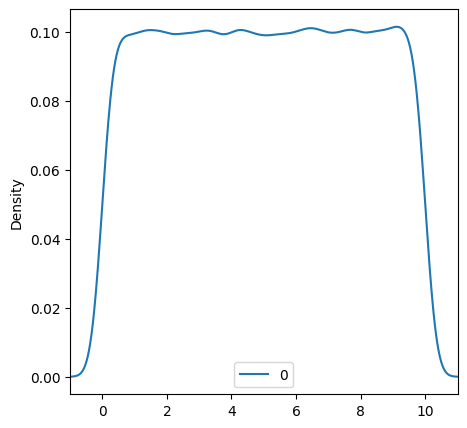

In [89]:
df.plot(kind="density",  # Plot the distribution
                               figsize=(5,5),
                               xlim=(-1,11));

In [90]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check 25%
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

In [91]:
stats.uniform.ppf(q=0.25,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)

2.5

In [92]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

In [93]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


In [99]:
prob_under_minus1 = stats.norm.cdf(x= -1,
                                loc = 0,
                                scale= 1)
prob_above_minus1  =stats.norm.cdf(x= 1,
                                loc = 0,
                                scale= 1)

prob_over_1 = 1 - prob_above_minus1

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_above_minus1, prob_over_1, between_prob)

0.15865525393145707 0.8413447460685429 0.15865525393145707 0.6826894921370859


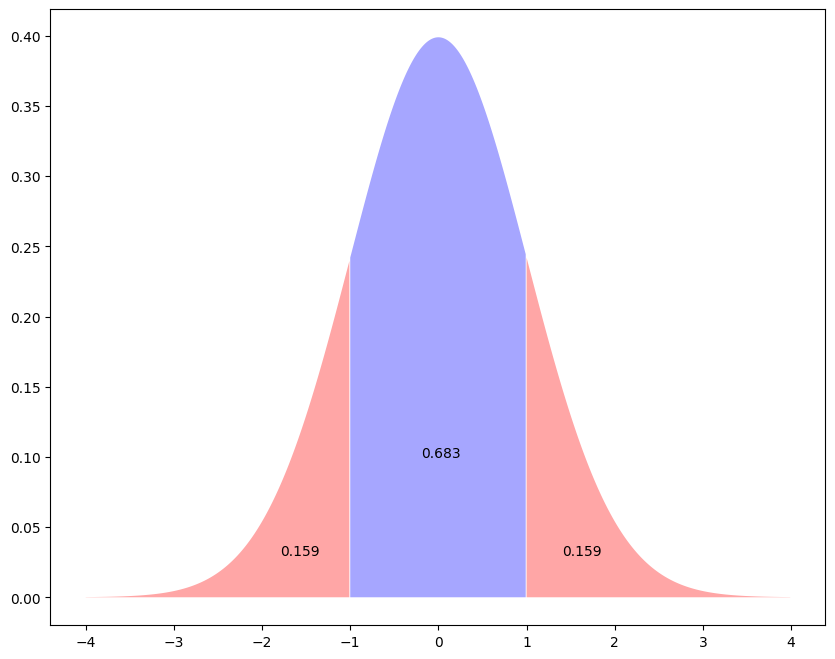

In [100]:
import numpy as np
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (10,8)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

*Note: This lesson uses some plotting code we did not cover in the plotting lesson in order to make plots for explanatory purposes.*

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.
Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

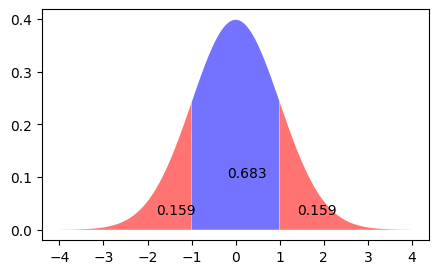

In [101]:

plt.rcParams["figure.figsize"] = (5,3)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.55)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.55)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.55)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

## The Binomial Distribution

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts   8  107  418  1140  2062  2498  2109  1156  402  93   7


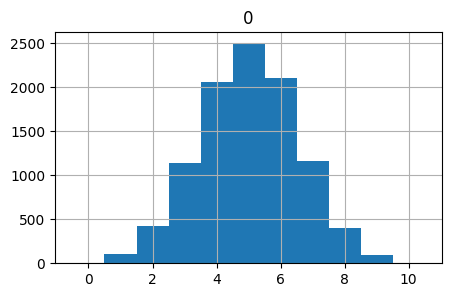

In [102]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print(pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   1  55  270  894  1948  3042  2700  1090


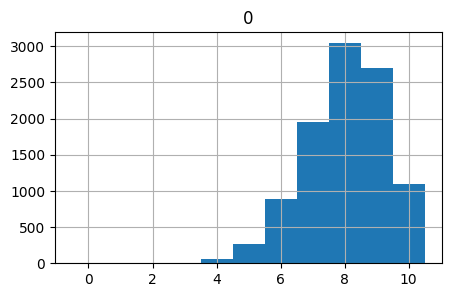

In [103]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function lets us check the probability of achieving a number of successes within a certain range:

In [104]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [105]:
1 - stats.binom.cdf(k=8,        # Probability of k = 8 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [106]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000003

In [107]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999993

## The Poisson Distribution

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

col_0      0     1     2    3    4   5  6  8
row_0                                       
counts  3704  3710  1794  586  162  34  9  1


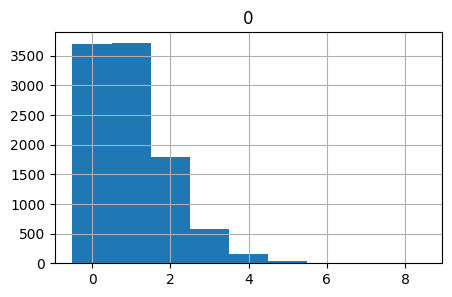

In [108]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   2   3    4    5    6    7     8     9     10    11  ...   15   16  \
row_0                                                       ...             
counts  31  70  167  388  631  906  1155  1319  1272  1129  ...  336  214   

col_0    17  18  19  20  21  22  24  25  
row_0                                    
counts  126  68  24  17   9   7   2   1  

[1 rows x 23 columns]


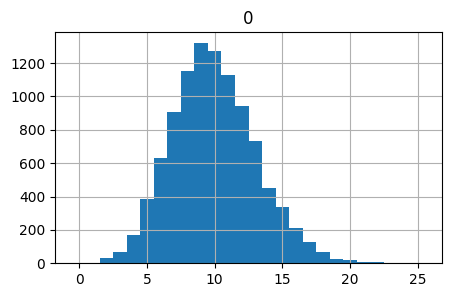

In [109]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data (rvs function that generates random numbers)
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [110]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [111]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

In [112]:
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt


n = 20 #num of coin flips for each trial
p = 0.50 #probability of success (head) -- let's say it is a fair coin
size = 25 #number of the trials I want to do -- so I want 25 20 coin flips

data_binom = binom.rvs(n=n, p=p, size=size)

data_binom

array([ 9, 10, 10,  8, 11, 10,  8, 10,  8, 10,  7,  8,  7, 11, 10,  7, 11,
        8,  9,  8,  7,  9,  8, 10, 14], dtype=int64)

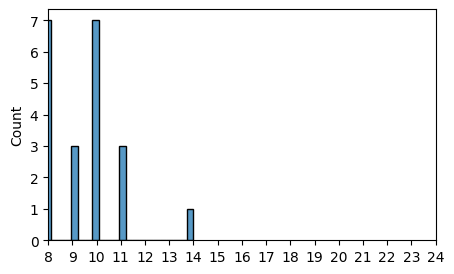

In [113]:
#Tie it back with the output above!

fig, ax = plt.subplots()

sns.histplot(data_binom, ax = ax, bins=25)
ax.set_xlim(8,24)
ax.set_xticks(range(8,25))
plt.show()

# Lab Task

In [114]:
import pandas as pd

df = pd.read_csv("king_county.csv")

In [115]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0


In [116]:
x = df["grade"].value_counts()
x

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

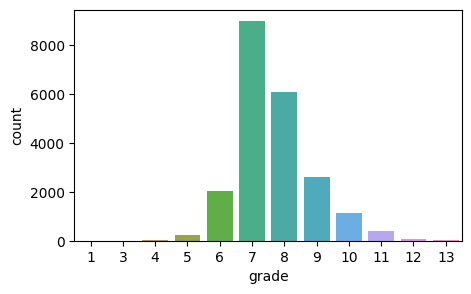

In [117]:
sns.countplot(x="grade", data=df)

In [118]:
import scipy.stats as stats

x = 80 #x-value
cdf_value =  stats.norm.cdf(x,loc=76,scale=2.5)
cdf_value

print(f'Probability of obtaining a value LESS THAN or equal to: {x} is {cdf_value}')

Probability of obtaining a value LESS THAN or equal to: 80 is 0.945200708300442


In [119]:
#Probability of being GREATER than my x

x = 80
cdf_value = 1 - stats.norm.cdf(x,loc=76,scale=2.5)
cdf_value

0.054799291699557995

In [120]:
#Get the mean and standard deviation from a .describe()
#Remember I am interested in continuous variables

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000


# let's find the cdf of column sqft_living

In [121]:
stats.no
rm.cdf(2200, 2080, 918)

AttributeError: module 'scipy.stats' has no attribute 'no'